# Analiza Eksploracyjna Danych (EDA) i Przygotowanie Danych
## System Wspomagania Decyzji w Triaży Medycznym

**Data:** 2025-10-15  
**Cel:** Analiza danych syntetycznych, identyfikacja wzorców i przygotowanie danych do modelowania ML

## 1. Import bibliotek i konfiguracja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Konfiguracja
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ustawienia wyświetlania
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✓ Biblioteki zaimportowane pomyślnie")

✓ Biblioteki zaimportowane pomyślnie


## 2. Załadowanie danych

In [2]:
# Ścieżki do plików
TRIAGE_DATA_PATH = '../../raw/triage_data.csv'
ARRANGEMENT_DATA_PATH = '../../raw/department_arrangement_data.csv'

# Wczytanie danych
print("="*70)
print("WCZYTYWANIE DANYCH")
print("="*70)

df_triage = pd.read_csv(TRIAGE_DATA_PATH)
df_arrangement = pd.read_csv(ARRANGEMENT_DATA_PATH)

print(f"\n✓ Dane triaży: {df_triage.shape[0]} wierszy × {df_triage.shape[1]} kolumn")
print(f"✓ Dane alokacji: {df_arrangement.shape[0]} wierszy × {df_arrangement.shape[1]} kolumn")

WCZYTYWANIE DANYCH

✓ Dane triaży: 1500 wierszy × 19 kolumn
✓ Dane alokacji: 300 wierszy × 12 kolumn


## 3. Wstępna inspekcja danych

In [3]:
print("="*70)
print("INSPEKCJA DANYCH TRIAŻY")
print("="*70)

# Wyświetlenie pierwszych wierszy
print("\n--- Pierwsze 5 wierszy ---")
display(df_triage.head())

INSPEKCJA DANYCH TRIAŻY

--- Pierwsze 5 wierszy ---


,id_przypadku,szablon_przypadku,wiek,płeć,data_przyjęcia,objawy,choroby_współistniejące,oddział_docelowy,kategoria_triażu,tętno,ciśnienie_skurczowe,ciśnienie_rozkurczowe,temperatura,saturacja,ból,częstość_oddechów,GCS,hemoglobina,poziom_cukru
0,807193dc,zatrucie_pokarmowe,24,K,2025-11-12 16:27:25,odwodnienie,depresja,Interna,3,88,113,73.40,37.30,97.90,NaN,NaN,NaN,NaN,NaN
1,6029294d,zapalenie_wyrostka,39,K,2025-01-15 08:58:26,"objawy otrzewnowe,wymioty",depresja,Chirurgia,2,105,128,81.90,38.10,97.70,8.10,NaN,NaN,NaN,NaN
2,d638f7a5,zaostrzenie_pochp,53,K,2025-04-06 06:31:38,"duszność,obrzęki kończyn dolnych,odkrztuszanie...","POChP,niewydolność serca,palenie papierosów,na...",SOR,1,135,148,74.00,38.20,88.30,NaN,36.00,NaN,NaN,NaN
3,03ab2b76,udar,86,K,2025-03-12 19:03:18,"zawroty głowy,zaburzenia równowagi","przebyty udar,nadciśnienie,cukrzyca typu 2,cho...",SOR,1,95,172,92.30,36.40,96.10,NaN,NaN,10.00,NaN,NaN
4,807618f0,infekcja_ukladu_moczowego,85,M,2025-01-18 15:29:39,"częstomocz,ból przy oddawaniu moczu","nadciśnienie,cukrzyca typu 2,choroba wieńcowa",SOR,2,98,143,64.40,38.10,96.20,6.30,NaN,NaN,NaN,NaN


In [4]:
# Informacje o typach danych
print("\n--- Informacje o kolumnach ---")
df_triage.info()


--- Informacje o kolumnach ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_przypadku             1500 non-null   object 
 1   szablon_przypadku        1500 non-null   object 
 2   wiek                     1500 non-null   int64  
 3   płeć                     1500 non-null   object 
 4   data_przyjęcia           1500 non-null   object 
 5   objawy                   1500 non-null   object 
 6   choroby_współistniejące  1275 non-null   object 
 7   oddział_docelowy         1500 non-null   object 
 8   kategoria_triażu         1500 non-null   int64  
 9   tętno                    1500 non-null   int64  
 10  ciśnienie_skurczowe      1500 non-null   int64  
 11  ciśnienie_rozkurczowe    1500 non-null   float64
 12  temperatura              1500 non-null   float64
 13  saturacja                1500 non-null   float

In [5]:
# Statystyki opisowe dla zmiennych numerycznych
print("\n--- Statystyki opisowe (zmienne numeryczne) ---")
display(df_triage.describe())


--- Statystyki opisowe (zmienne numeryczne) ---


,wiek,kategoria_triażu,tętno,ciśnienie_skurczowe,ciśnienie_rozkurczowe,temperatura,saturacja,ból,częstość_oddechów,GCS,hemoglobina,poziom_cukru
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,602.00,213.00,352.00,152.00,91.00
mean,48.83,2.10,106.74,131.26,75.53,37.27,95.27,7.09,30.65,9.14,8.51,91.78
std,23.24,1.04,21.18,19.15,9.36,0.94,3.22,1.31,5.32,1.91,1.01,14.11
min,2.00,1.00,50.00,79.00,44.90,35.20,80.60,3.10,20.00,3.00,6.20,63.00
25%,30.00,1.00,90.00,119.00,70.20,36.60,93.80,6.10,26.00,8.00,7.88,82.05
50%,51.00,2.00,105.00,130.00,75.20,37.00,96.30,7.30,31.00,9.00,8.50,91.70
75%,68.00,3.00,121.00,142.00,80.70,37.70,97.62,8.07,35.00,10.00,9.20,101.10
max,94.00,5.00,181.00,211.00,112.80,40.80,100.00,9.80,46.00,14.00,10.80,124.50


In [6]:
# Analiza brakujących wartości
print("\n--- Brakujące wartości ---")
missing = df_triage.isnull().sum()
missing_pct = (missing / len(df_triage)) * 100
missing_df = pd.DataFrame({
    'Liczba': missing,
    'Procent': missing_pct
}).sort_values('Liczba', ascending=False)
display(missing_df[missing_df['Liczba'] > 0])


--- Brakujące wartości ---


,Liczba,Procent
poziom_cukru,1409,93.93
hemoglobina,1348,89.87
częstość_oddechów,1287,85.80
GCS,1148,76.53
ból,898,59.87
choroby_współistniejące,225,15.00


## 4. Feature Engineering - Cechy czasowe

In [7]:
print("="*70)
print("PRZYGOTOWANIE DANYCH")
print("="*70)

# Konwersja daty
df_triage['data_przyjęcia'] = pd.to_datetime(df_triage['data_przyjęcia'])
df_arrangement['timestamp'] = pd.to_datetime(df_arrangement['timestamp'])

# Ekstrakcja cech czasowych
df_triage['godzina'] = df_triage['data_przyjęcia'].dt.hour
df_triage['dzien_tygodnia'] = df_triage['data_przyjęcia'].dt.dayofweek
df_triage['miesiac'] = df_triage['data_przyjęcia'].dt.month
df_triage['czy_weekend'] = df_triage['dzien_tygodnia'].isin([5, 6]).astype(int)

# Nazwy dni tygodnia
dni_tygodnia_map = {0: 'Pn', 1: 'Wt', 2: 'Śr', 3: 'Cz', 4: 'Pt', 5: 'Sb', 6: 'Nd'}
df_triage['dzien_nazwa'] = df_triage['dzien_tygodnia'].map(dni_tygodnia_map)

# Pora dnia
def okresl_pore_dnia(godzina):
    if 6 <= godzina < 12:
        return 'Rano'
    elif 12 <= godzina < 18:
        return 'Popołudnie'
    elif 18 <= godzina < 24:
        return 'Wieczór'
    else:
        return 'Noc'

df_triage['pora_dnia'] = df_triage['godzina'].apply(okresl_pore_dnia)

print("✓ Cechy czasowe utworzone")
print(f"\nNowe kolumny: {list(df_triage.columns[-6:])}")

PRZYGOTOWANIE DANYCH
✓ Cechy czasowe utworzone

Nowe kolumny: ['godzina', 'dzien_tygodnia', 'miesiac', 'czy_weekend', 'dzien_nazwa', 'pora_dnia']


## 5. Analiza rozkładów - Zmienne kategoryczne

In [8]:
# Funkcja do tworzenia wykresów rozkładów
def plot_categorical_distribution(df, column, title, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    counts = df[column].value_counts()
    counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Liczba przypadków', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Dodanie wartości na słupkach
    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts)*0.01, str(v), ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Statystyki
    print(f"\nRozkład: {column}")
    print(counts)
    print(f"Procent:\n{(counts/len(df)*100).round(2)}")


--- Kategorie Triaży ---


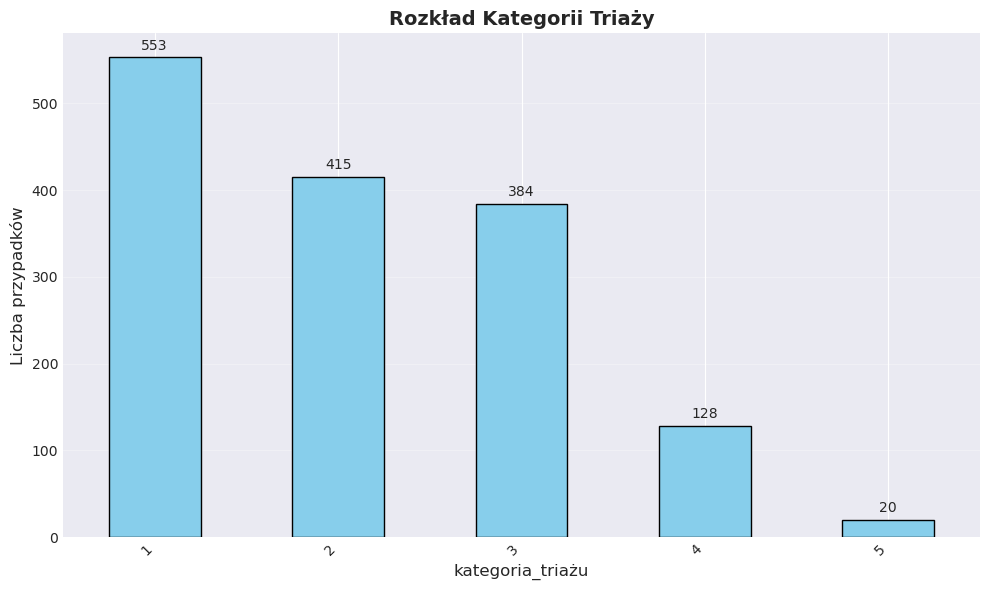


Rozkład: kategoria_triażu
kategoria_triażu
1    553
2    415
3    384
4    128
5     20
Name: count, dtype: int64
Procent:
kategoria_triażu
1   36.87
2   27.67
3   25.60
4    8.53
5    1.33
Name: count, dtype: float64


In [9]:
# Kategorie triaży
print("\n--- Kategorie Triaży ---")
plot_categorical_distribution(df_triage, 'kategoria_triażu', 
                              'Rozkład Kategorii Triaży', (10, 6))


--- Oddziały Docelowe ---


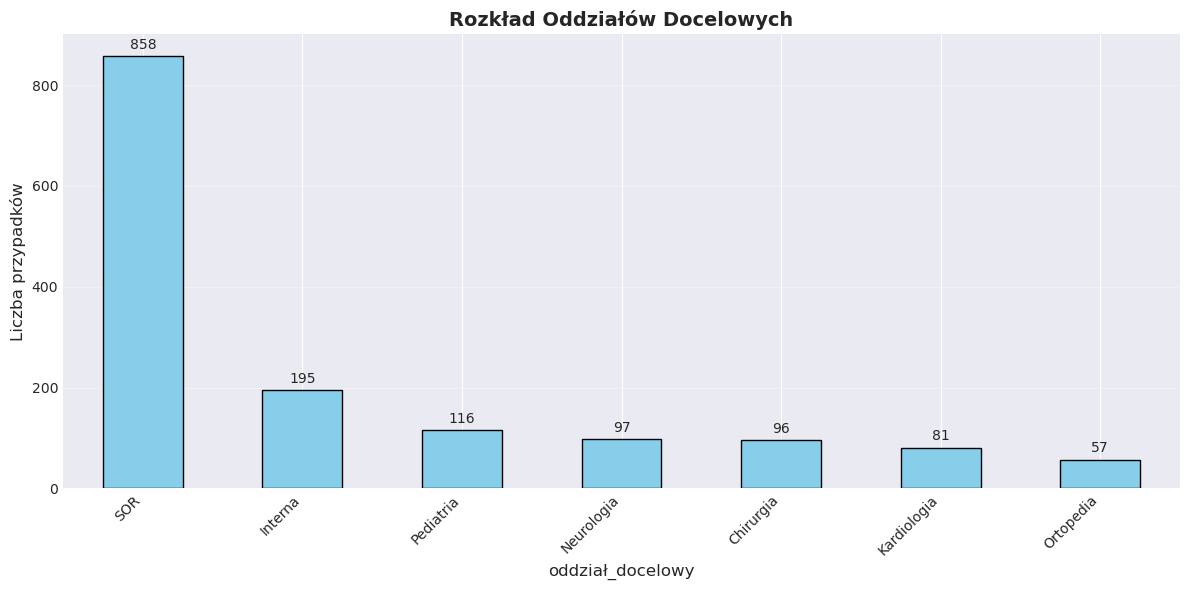


Rozkład: oddział_docelowy
oddział_docelowy
SOR            858
Interna        195
Pediatria      116
Neurologia      97
Chirurgia       96
Kardiologia     81
Ortopedia       57
Name: count, dtype: int64
Procent:
oddział_docelowy
SOR           57.20
Interna       13.00
Pediatria      7.73
Neurologia     6.47
Chirurgia      6.40
Kardiologia    5.40
Ortopedia      3.80
Name: count, dtype: float64


In [10]:
# Oddziały docelowe
print("\n--- Oddziały Docelowe ---")
plot_categorical_distribution(df_triage, 'oddział_docelowy', 
                              'Rozkład Oddziałów Docelowych', (12, 6))


--- Płeć ---


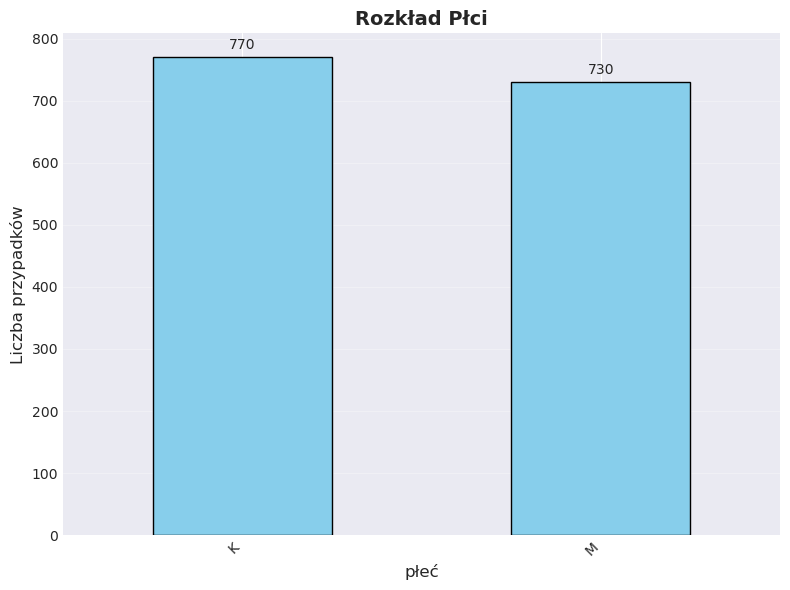


Rozkład: płeć
płeć
K    770
M    730
Name: count, dtype: int64
Procent:
płeć
K   51.33
M   48.67
Name: count, dtype: float64


In [11]:
# Płeć
print("\n--- Płeć ---")
plot_categorical_distribution(df_triage, 'płeć', 
                              'Rozkład Płci', (8, 6))


--- Top 10 Szablonów Przypadków ---


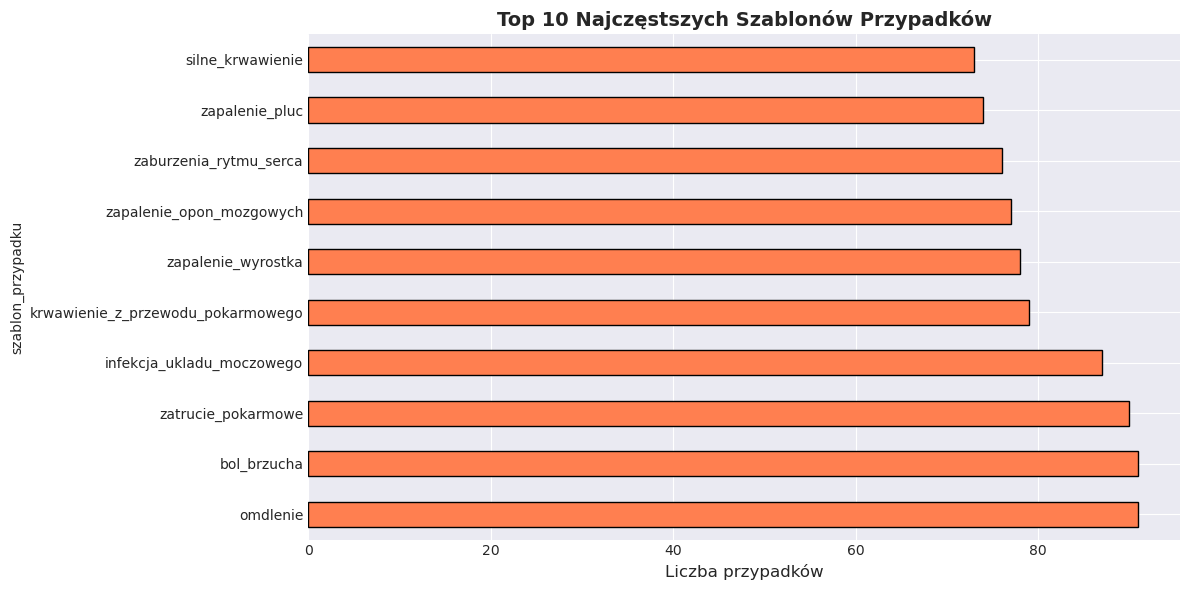

In [12]:
# Szablony przypadków
print("\n--- Top 10 Szablonów Przypadków ---")
top_templates = df_triage['szablon_przypadku'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12, 6))
top_templates.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_title('Top 10 Najczęstszych Szablonów Przypadków', fontsize=14, fontweight='bold')
ax.set_xlabel('Liczba przypadków', fontsize=12)
plt.tight_layout()
plt.show()

## 6. Analiza rozkładów - Zmienne numeryczne

In [13]:
# Lista parametrów życiowych
vital_params = ['wiek', 'tętno', 'ciśnienie_skurczowe', 'ciśnienie_rozkurczowe', 
                'temperatura', 'saturacja']

# Funkcja do analizy zmiennej numerycznej
def analyze_numeric_variable(df, column):
    print(f"\n{'='*50}")
    print(f"Analiza: {column}")
    print('='*50)
    
    # Usunięcie NaN
    data = df[column].dropna()
    
    if len(data) == 0:
        print("Brak danych!")
        return
    
    # Statystyki
    print(f"\nŚrednia: {data.mean():.2f}")
    print(f"Mediana: {data.median():.2f}")
    print(f"Odch. std.: {data.std():.2f}")
    print(f"Min: {data.min():.2f}")
    print(f"Max: {data.max():.2f}")
    print(f"Q1: {data.quantile(0.25):.2f}")
    print(f"Q3: {data.quantile(0.75):.2f}")
    
    # Wykres
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Średnia: {data.mean():.2f}')
    axes[0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {data.median():.2f}')
    axes[0].set_title(f'Histogram: {column}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(column, fontsize=10)
    axes[0].set_ylabel('Częstość', fontsize=10)
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title(f'Boxplot: {column}', fontsize=12, fontweight='bold')
    axes[1].set_ylabel(column, fontsize=10)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


Analiza: wiek

Średnia: 48.83
Mediana: 51.00
Odch. std.: 23.24
Min: 2.00
Max: 94.00
Q1: 30.00
Q3: 68.00


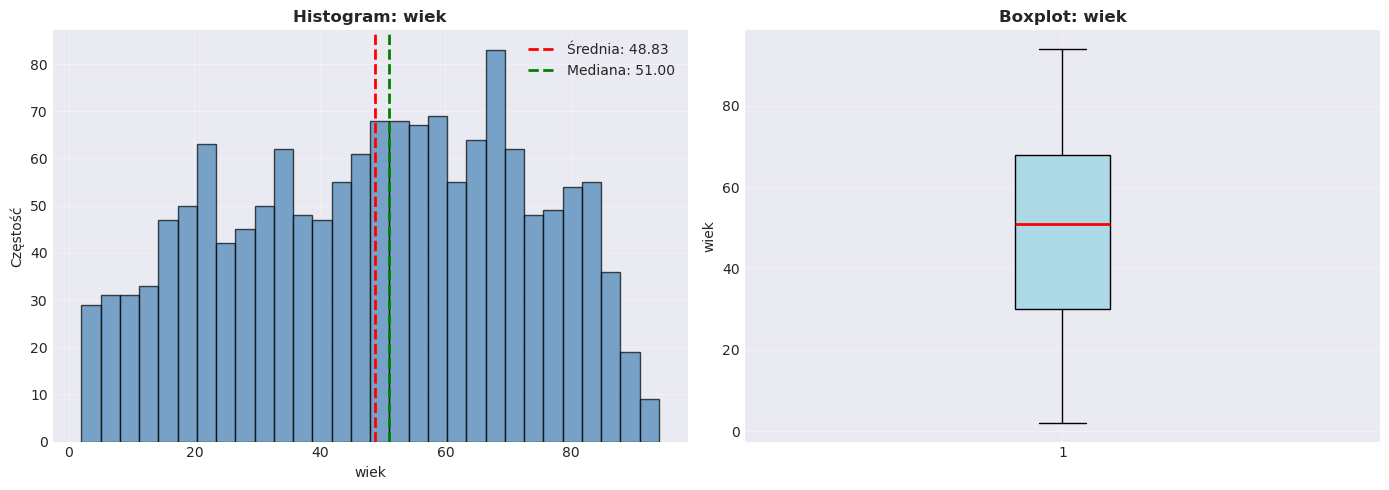


Analiza: tętno

Średnia: 106.74
Mediana: 105.00
Odch. std.: 21.18
Min: 50.00
Max: 181.00
Q1: 90.00
Q3: 121.00


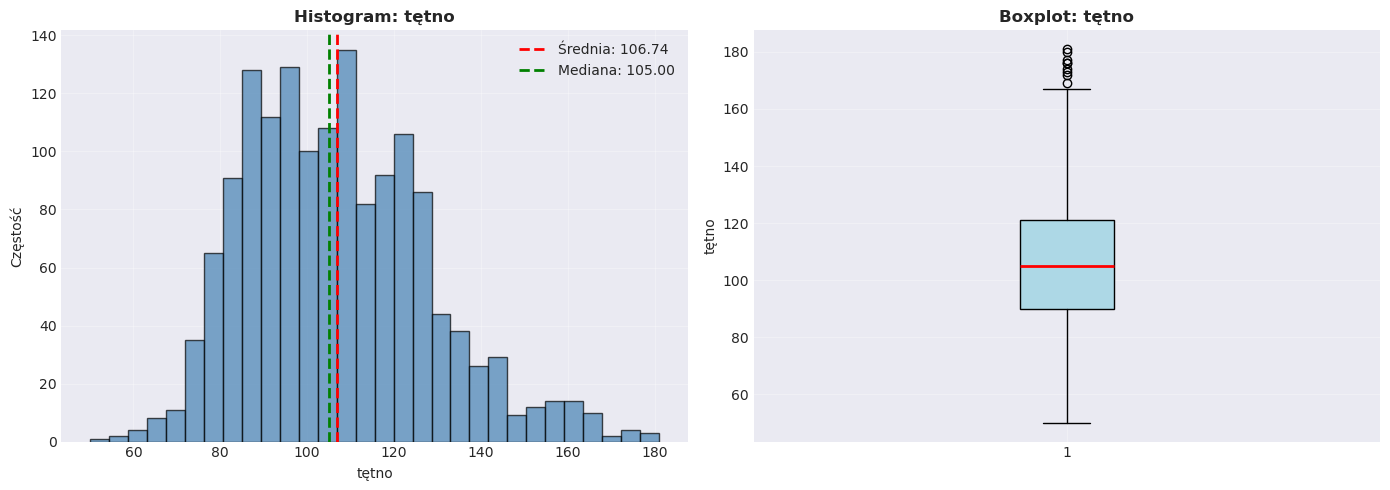


Analiza: ciśnienie_skurczowe

Średnia: 131.26
Mediana: 130.00
Odch. std.: 19.15
Min: 79.00
Max: 211.00
Q1: 119.00
Q3: 142.00


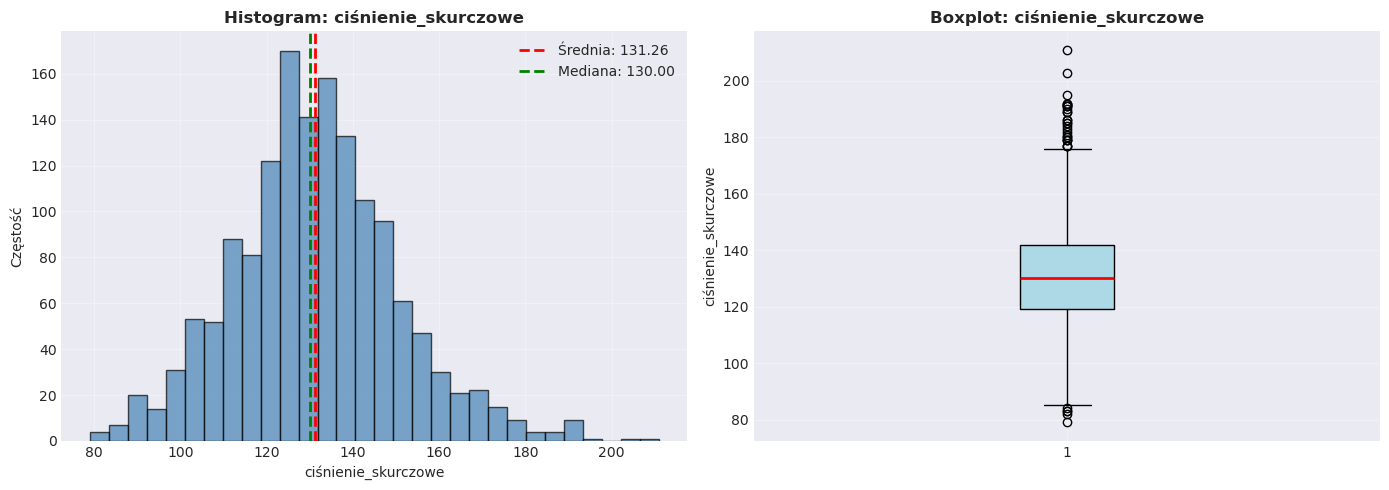


Analiza: ciśnienie_rozkurczowe

Średnia: 75.53
Mediana: 75.20
Odch. std.: 9.36
Min: 44.90
Max: 112.80
Q1: 70.20
Q3: 80.70


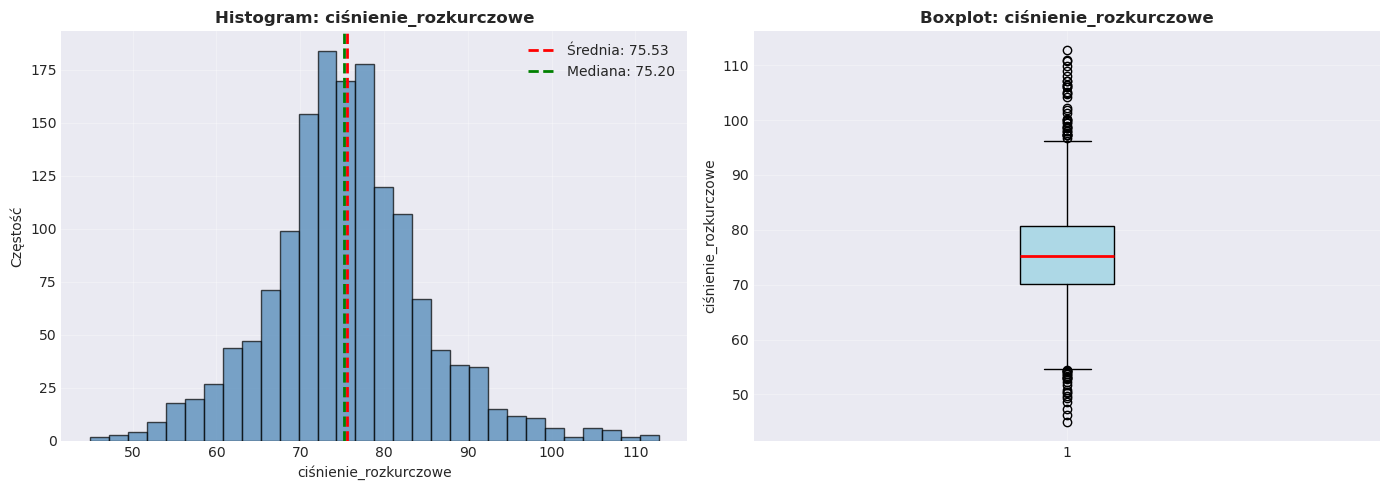


Analiza: temperatura

Średnia: 37.27
Mediana: 37.00
Odch. std.: 0.94
Min: 35.20
Max: 40.80
Q1: 36.60
Q3: 37.70


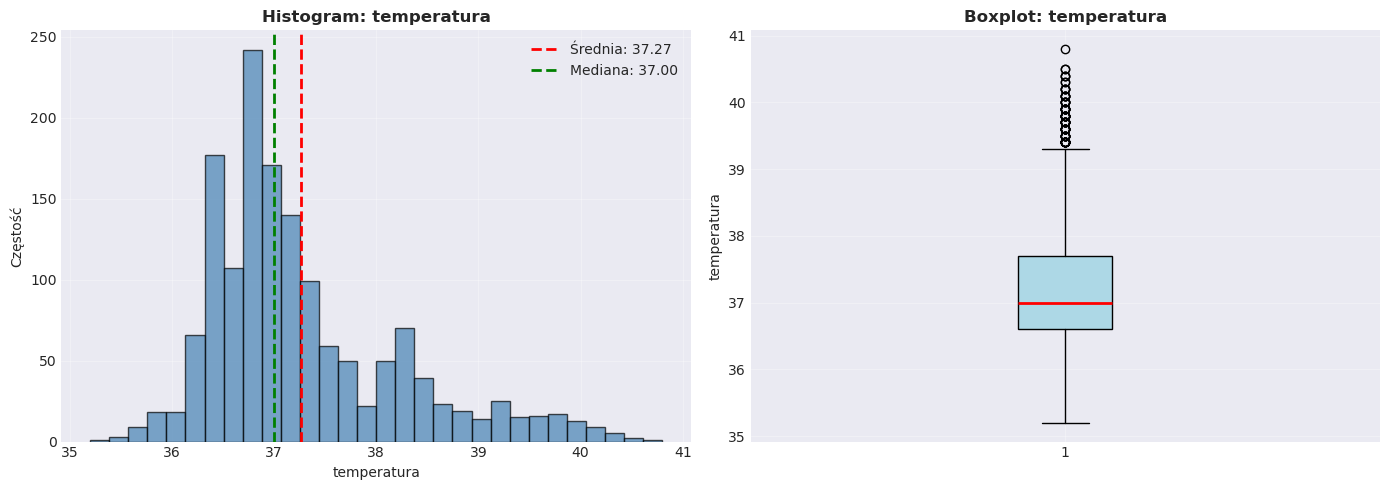


Analiza: saturacja

Średnia: 95.27
Mediana: 96.30
Odch. std.: 3.22
Min: 80.60
Max: 100.00
Q1: 93.80
Q3: 97.62


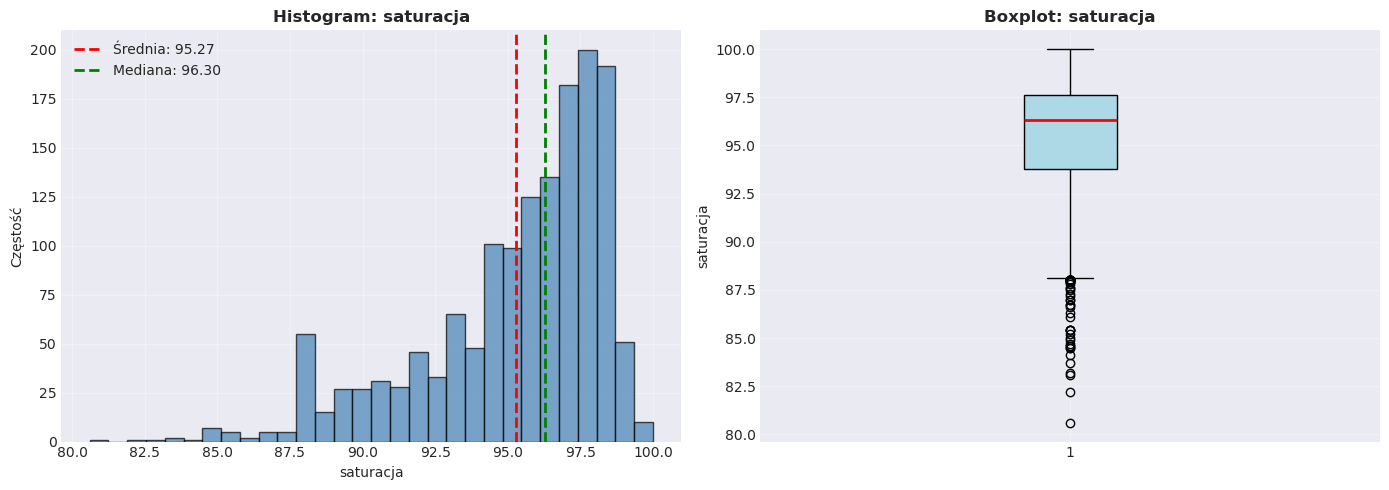

In [14]:
# Analiza każdego parametru
for param in vital_params:
    if param in df_triage.columns:
        analyze_numeric_variable(df_triage, param)

## 7. Analiza wzorców czasowych


--- Rozkład przyjęć według godziny ---


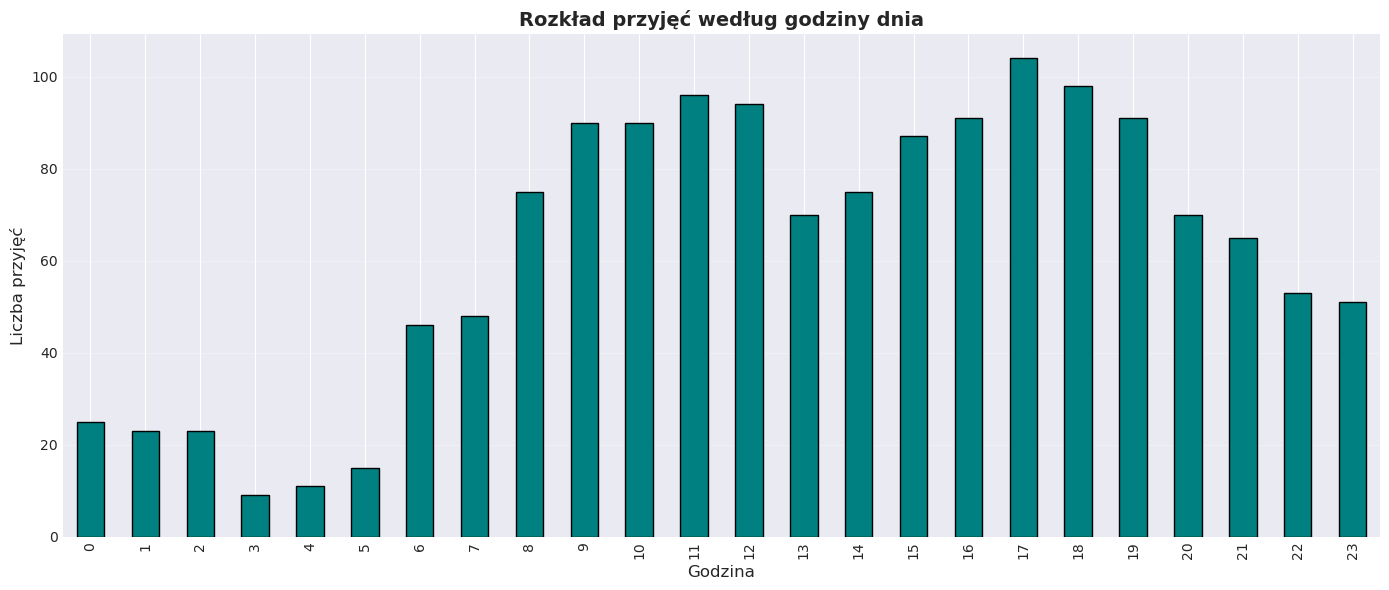

In [15]:
# Przyjęcia według godziny
print("\n--- Rozkład przyjęć według godziny ---")
fig, ax = plt.subplots(figsize=(14, 6))
hourly_admits = df_triage.groupby('godzina').size()
hourly_admits.plot(kind='bar', ax=ax, color='teal', edgecolor='black')
ax.set_title('Rozkład przyjęć według godziny dnia', fontsize=14, fontweight='bold')
ax.set_xlabel('Godzina', fontsize=12)
ax.set_ylabel('Liczba przyjęć', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


--- Rozkład przyjęć według dnia tygodnia ---


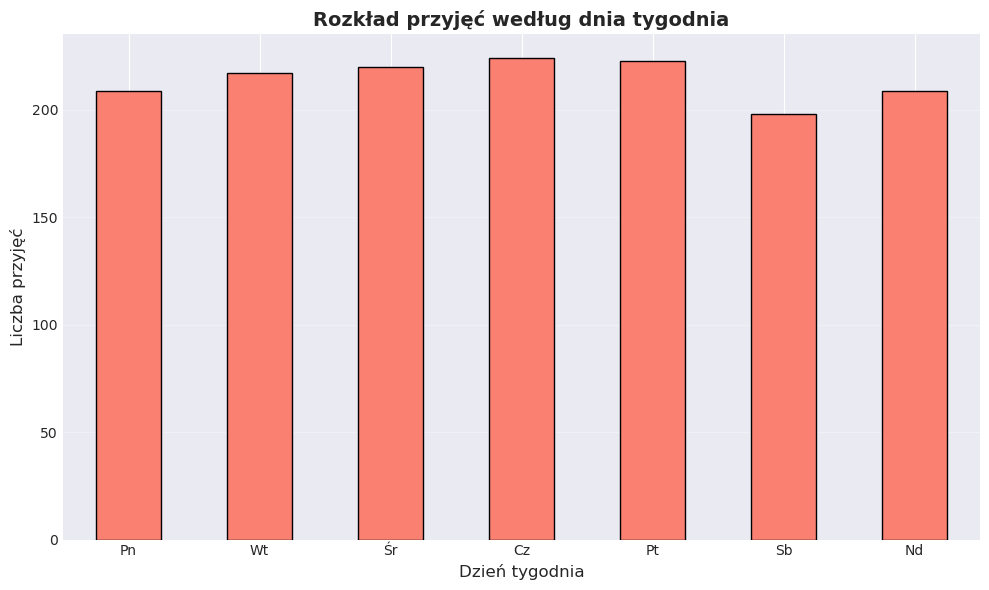

In [16]:
# Przyjęcia według dnia tygodnia
print("\n--- Rozkład przyjęć według dnia tygodnia ---")
fig, ax = plt.subplots(figsize=(10, 6))
daily_admits = df_triage.groupby('dzien_nazwa').size().reindex(['Pn', 'Wt', 'Śr', 'Cz', 'Pt', 'Sb', 'Nd'])
daily_admits.plot(kind='bar', ax=ax, color='salmon', edgecolor='black')
ax.set_title('Rozkład przyjęć według dnia tygodnia', fontsize=14, fontweight='bold')
ax.set_xlabel('Dzień tygodnia', fontsize=12)
ax.set_ylabel('Liczba przyjęć', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


--- Rozkład przyjęć według miesiąca ---


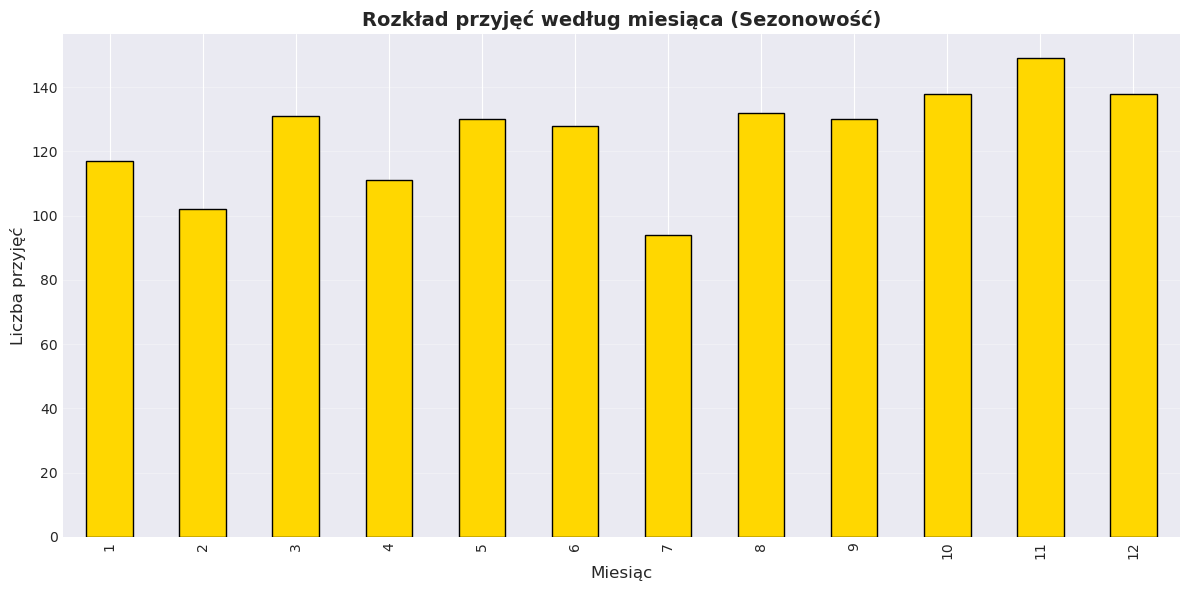

In [17]:
# Przyjęcia według miesiąca
print("\n--- Rozkład przyjęć według miesiąca ---")
fig, ax = plt.subplots(figsize=(12, 6))
monthly_admits = df_triage.groupby('miesiac').size()
monthly_admits.plot(kind='bar', ax=ax, color='gold', edgecolor='black')
ax.set_title('Rozkład przyjęć według miesiąca (Sezonowość)', fontsize=14, fontweight='bold')
ax.set_xlabel('Miesiąc', fontsize=12)
ax.set_ylabel('Liczba przyjęć', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


--- Rozkład przyjęć według pory dnia ---


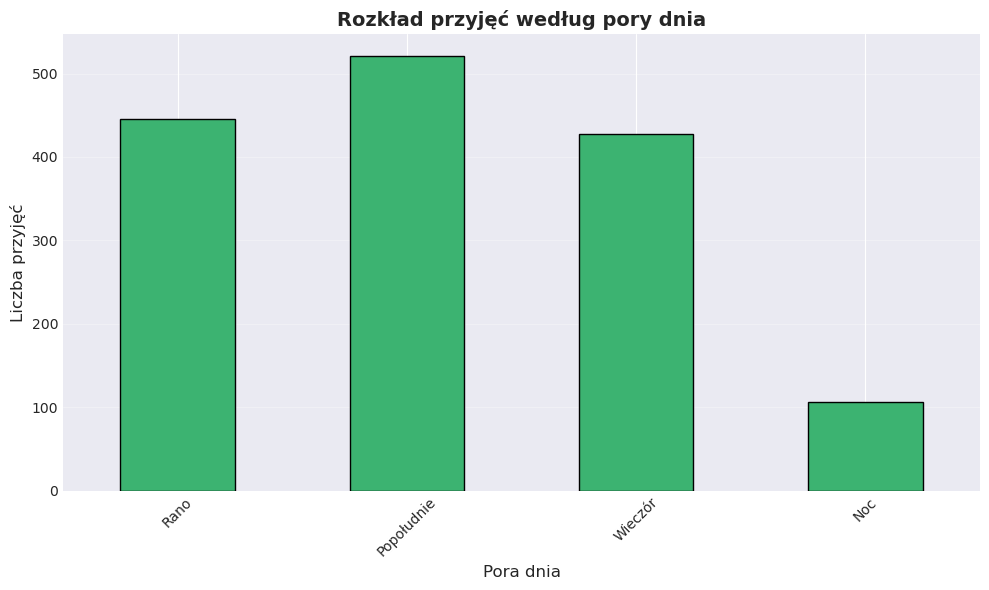

In [18]:
# Przyjęcia według pory dnia
print("\n--- Rozkład przyjęć według pory dnia ---")
fig, ax = plt.subplots(figsize=(10, 6))
pora_admits = df_triage.groupby('pora_dnia').size().reindex(['Rano', 'Popołudnie', 'Wieczór', 'Noc'])
pora_admits.plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
ax.set_title('Rozkład przyjęć według pory dnia', fontsize=14, fontweight='bold')
ax.set_xlabel('Pora dnia', fontsize=12)
ax.set_ylabel('Liczba przyjęć', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Analiza korelacji


--- Macierz korelacji ---


,wiek,tętno,ciśnienie_skurczowe,ciśnienie_rozkurczowe,temperatura,saturacja,kategoria_triażu
wiek,1.00,-0.18,0.27,0.07,-0.23,-0.25,-0.05
tętno,-0.18,1.00,-0.20,-0.18,0.40,-0.35,-0.32
ciśnienie_skurczowe,0.27,-0.20,1.00,0.48,0.05,0.00,-0.08
ciśnienie_rozkurczowe,0.07,-0.18,0.48,1.00,0.13,0.09,-0.07
temperatura,-0.23,0.40,0.05,0.13,1.00,0.08,0.01
saturacja,-0.25,-0.35,0.00,0.09,0.08,1.00,0.37
kategoria_triażu,-0.05,-0.32,-0.08,-0.07,0.01,0.37,1.00


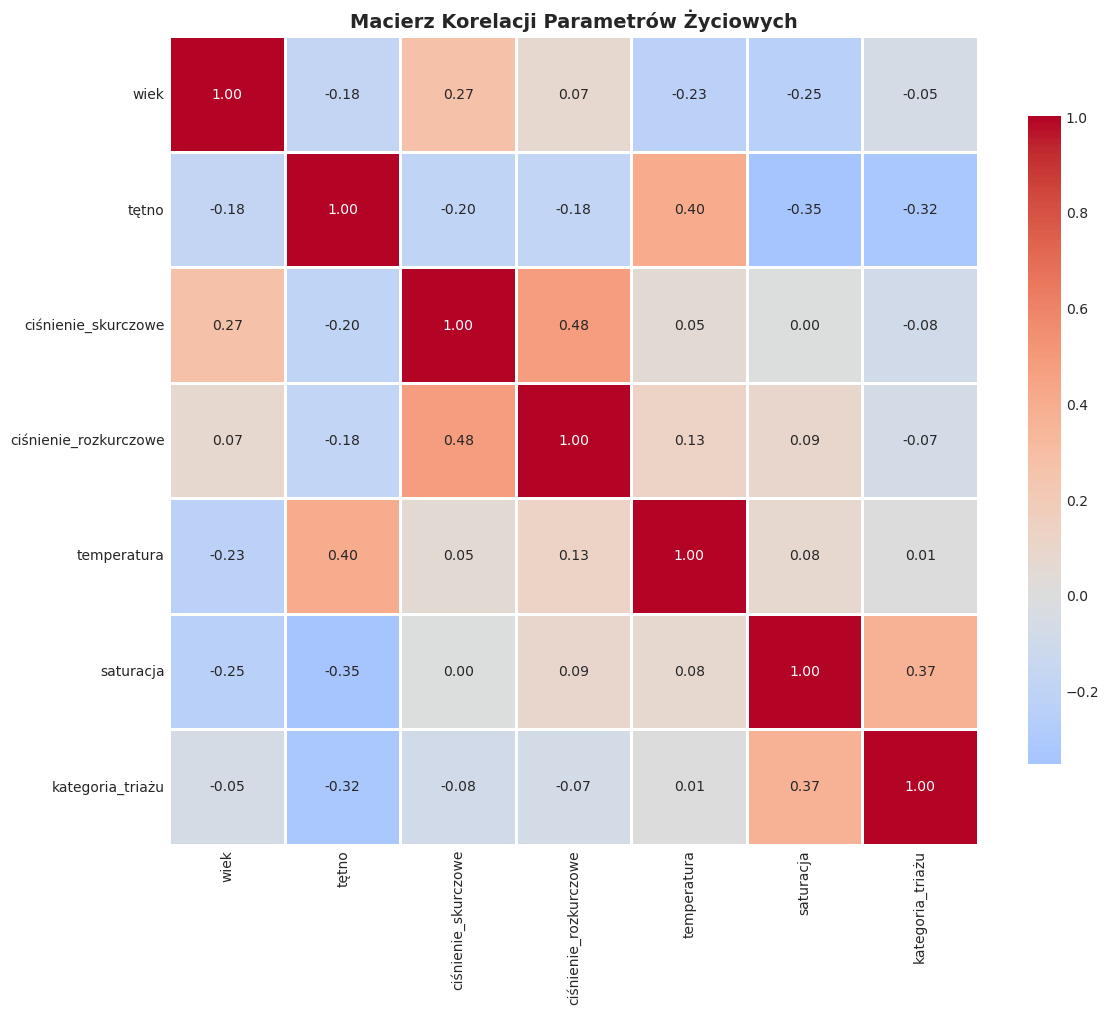

In [19]:
# Wybór zmiennych numerycznych do korelacji
numeric_cols = ['wiek', 'tętno', 'ciśnienie_skurczowe', 'ciśnienie_rozkurczowe',
                'temperatura', 'saturacja', 'kategoria_triażu']

# Filtracja istniejących kolumn
available_cols = [col for col in numeric_cols if col in df_triage.columns]

# Macierz korelacji
corr_matrix = df_triage[available_cols].corr()

print("\n--- Macierz korelacji ---")
display(corr_matrix)

# Wizualizacja
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Macierz Korelacji Parametrów Życiowych', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Analiza według kategorii triaży

In [20]:
# Parametry życiowe według kategorii triaży
print("\n--- Średnie parametry według kategorii triaży ---")
triage_stats = df_triage.groupby('kategoria_triażu')[available_cols[:-1]].mean()
display(triage_stats)


--- Średnie parametry według kategorii triaży ---


,wiek,tętno,ciśnienie_skurczowe,ciśnienie_rozkurczowe,temperatura,saturacja
kategoria_triażu,,,,,,
1,49.89,115.29,133.97,76.59,37.31,93.74
2,50.41,106.08,129.51,75.02,37.19,95.54
3,46.31,98.14,129.76,74.65,37.22,96.65
4,45.55,99.10,130.35,75.28,37.39,96.60
5,56.10,97.85,127.50,75.25,37.70,97.45


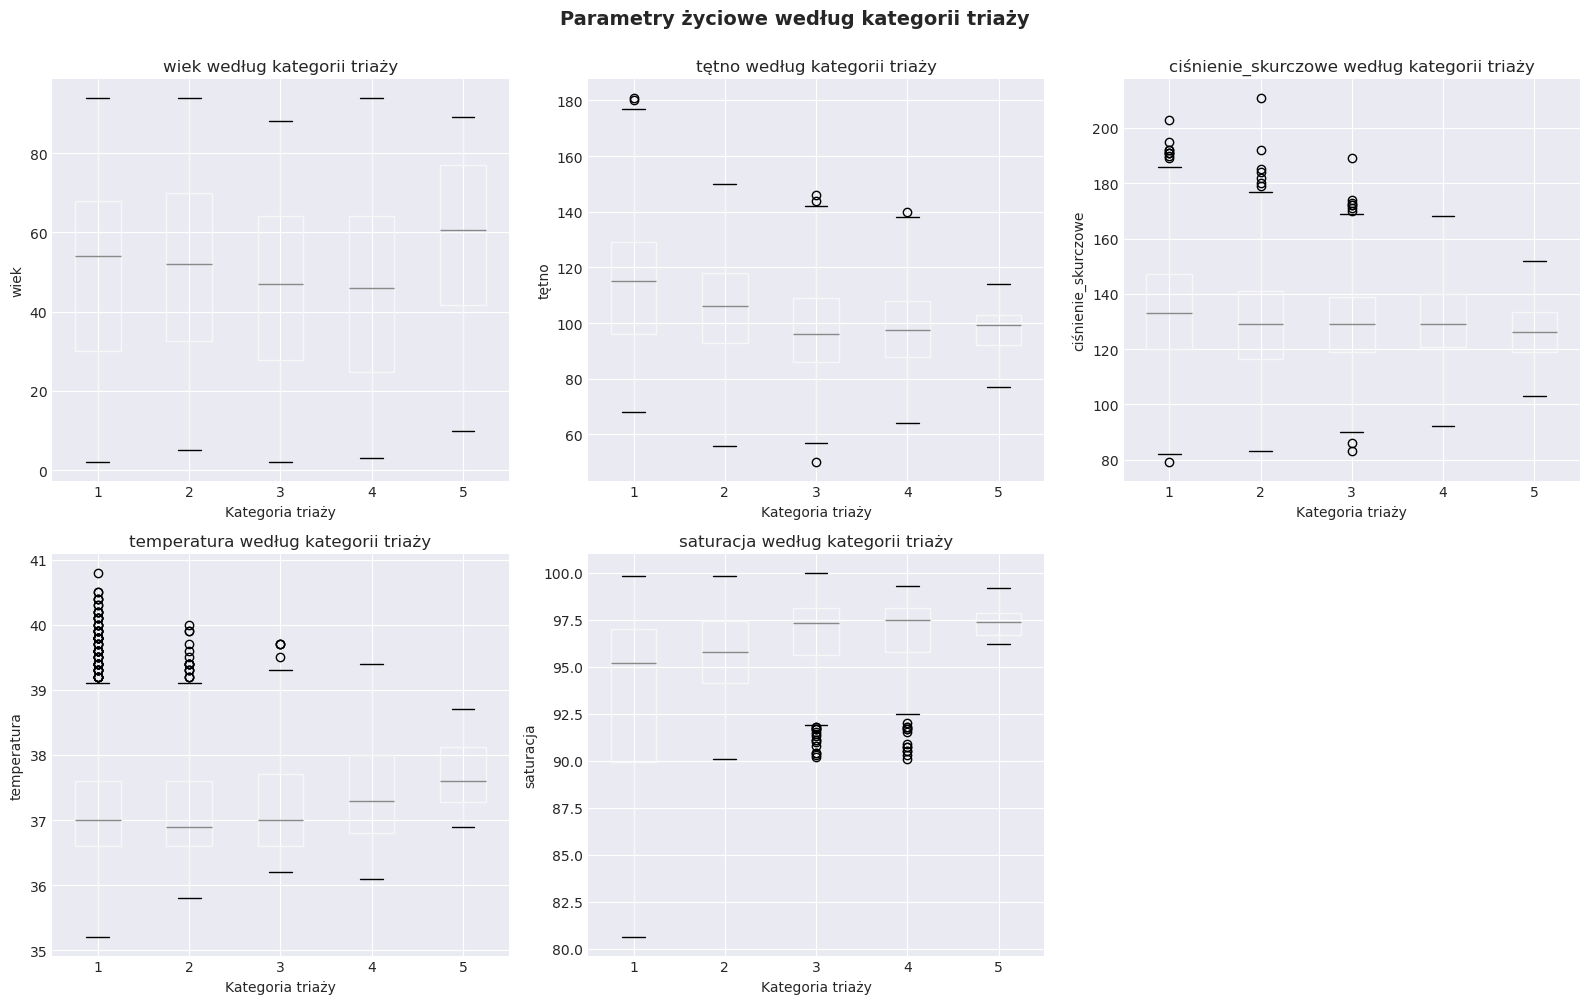

In [21]:
# Wizualizacja
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

params_to_plot = ['wiek', 'tętno', 'ciśnienie_skurczowe', 'temperatura', 'saturacja']

for idx, param in enumerate(params_to_plot):
    if param in df_triage.columns:
        df_triage.boxplot(column=param, by='kategoria_triażu', ax=axes[idx])
        axes[idx].set_title(f'{param} według kategorii triaży')
        axes[idx].set_xlabel('Kategoria triaży')
        axes[idx].set_ylabel(param)
        plt.sca(axes[idx])
        plt.xticks(rotation=0)

# Ukrycie pustego subplotu
if len(params_to_plot) < 6:
    axes[-1].axis('off')

plt.suptitle('')
fig.suptitle('Parametry życiowe według kategorii triaży', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 10. Analiza oddziałów


--- Kategorie triaży według oddziałów ---


kategoria_triażu,1,2,3,4,5
oddział_docelowy,,,,,
Chirurgia,0.00,56.25,39.58,3.12,1.04
Interna,0.00,30.26,44.10,21.54,4.10
Kardiologia,0.00,50.62,40.74,8.64,0.00
Neurologia,0.00,45.36,38.14,16.49,0.00
Ortopedia,0.00,21.05,70.18,8.77,0.00
Pediatria,0.00,43.10,35.34,18.97,2.59
SOR,64.45,18.07,12.70,3.85,0.93


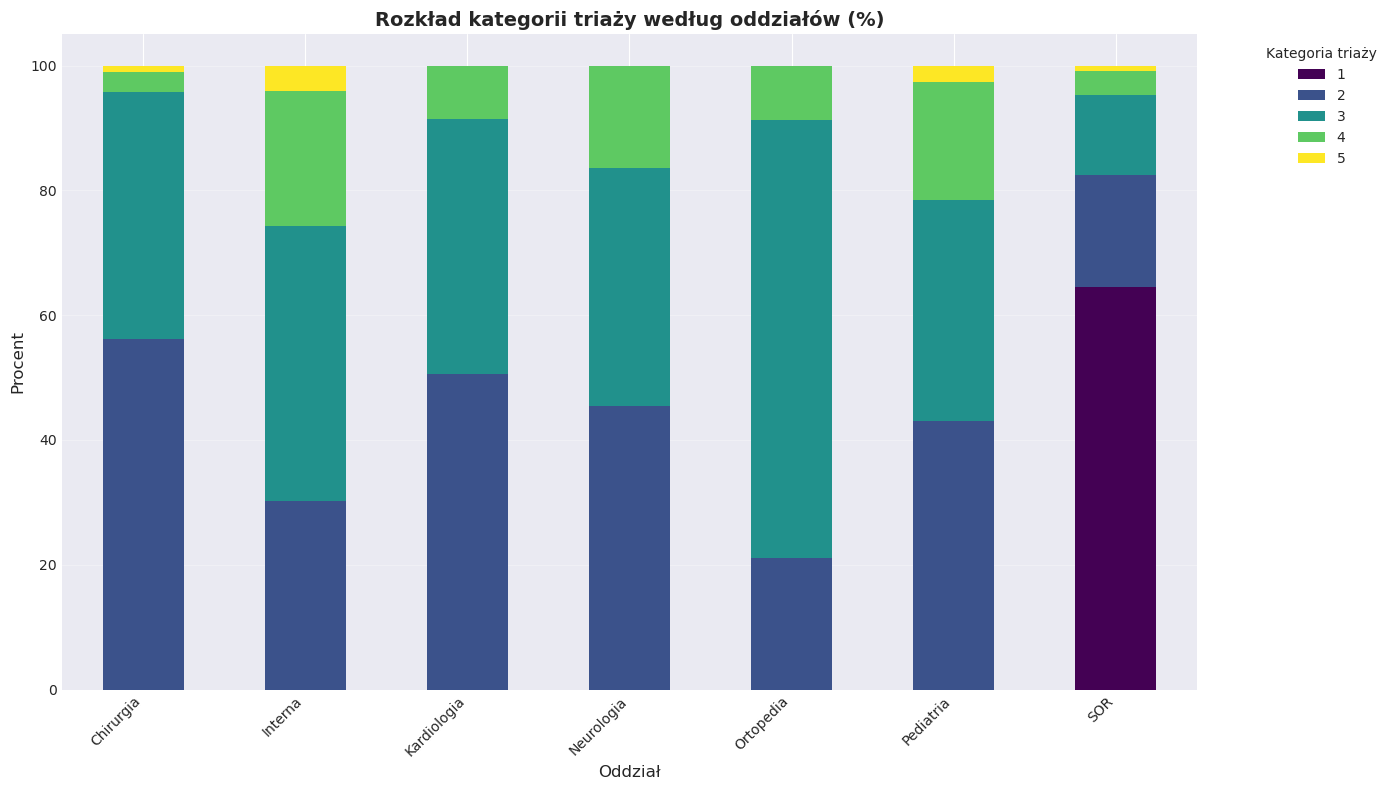

In [22]:
# Rozkład kategorii triaży według oddziałów
print("\n--- Kategorie triaży według oddziałów ---")
dept_triage = pd.crosstab(df_triage['oddział_docelowy'], 
                          df_triage['kategoria_triażu'], 
                          normalize='index') * 100

display(dept_triage.round(2))

# Wizualizacja
fig, ax = plt.subplots(figsize=(14, 8))
dept_triage.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Rozkład kategorii triaży według oddziałów (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Oddział', fontsize=12)
ax.set_ylabel('Procent', fontsize=12)
ax.legend(title='Kategoria triaży', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 11. Przygotowanie danych do modelowania

In [23]:
print("="*70)
print("PRZYGOTOWANIE DANYCH DO MODELOWANIA")
print("="*70)

# Stworzenie kopii dataframe
df_model = df_triage.copy()

# 1. Kodowanie zmiennych kategorycznych
print("\n--- Kodowanie zmiennych kategorycznych ---")

# Label encoding dla płci
df_model['płeć_encoded'] = df_model['płeć'].map({'M': 1, 'K': 0})

# One-hot encoding dla oddziałów
dept_dummies = pd.get_dummies(df_model['oddział_docelowy'], prefix='oddział')
df_model = pd.concat([df_model, dept_dummies], axis=1)

# One-hot encoding dla szablonów przypadków
template_dummies = pd.get_dummies(df_model['szablon_przypadku'], prefix='szablon')
df_model = pd.concat([df_model, template_dummies], axis=1)

print(f"✓ Zmienne zakodowane")
print(f"Nowa liczba kolumn: {df_model.shape[1]}")

PRZYGOTOWANIE DANYCH DO MODELOWANIA

--- Kodowanie zmiennych kategorycznych ---
✓ Zmienne zakodowane
Nowa liczba kolumn: 53


In [24]:
# 2. Selekcja cech dla modelu
print("\n--- Selekcja cech ---")

# Cechy numeryczne
numeric_features = ['wiek', 'tętno', 'ciśnienie_skurczowe', 'ciśnienie_rozkurczowe',
                   'temperatura', 'saturacja', 'płeć_encoded', 
                   'godzina', 'dzien_tygodnia', 'miesiac', 'czy_weekend']

# Dodanie cech dummy
dept_cols = [col for col in df_model.columns if col.startswith('oddział_')]
template_cols = [col for col in df_model.columns if col.startswith('szablon_')]

all_features = numeric_features + dept_cols + template_cols

# Usunięcie NaN
df_model_clean = df_model[all_features + ['kategoria_triażu']].dropna()

print(f"Liczba cech: {len(all_features)}")
print(f"Liczba rekordów po usunięciu NaN: {len(df_model_clean)}")


--- Selekcja cech ---
Liczba cech: 40
Liczba rekordów po usunięciu NaN: 1500


In [25]:
# 3. Normalizacja cech numerycznych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model_clean[numeric_features] = scaler.fit_transform(df_model_clean[numeric_features])

print("✓ Cechy numeryczne znormalizowane")

✓ Cechy numeryczne znormalizowane


In [26]:
# 4. Podział na X i y
X = df_model_clean[all_features]
y = df_model_clean['kategoria_triażu']

print(f"\nKształt X: {X.shape}")
print(f"Kształt y: {y.shape}")


Kształt X: (1500, 40)
Kształt y: (1500,)


In [27]:
# 5. Podział na zbiory treningowy, walidacyjny i testowy
from sklearn.model_selection import train_test_split

# Podział: 70% trening, 15% walidacja, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print("\n--- Podział zbiorów ---")
print(f"Zbiór treningowy: {X_train.shape[0]} próbek ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Zbiór walidacyjny: {X_val.shape[0]} próbek ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Zbiór testowy: {X_test.shape[0]} próbek ({X_test.shape[0]/len(X)*100:.1f}%)")


--- Podział zbiorów ---
Zbiór treningowy: 1049 próbek (69.9%)
Zbiór walidacyjny: 226 próbek (15.1%)
Zbiór testowy: 225 próbek (15.0%)


In [28]:
# Sprawdzenie balansu klas
print("\n--- Rozkład klas w zbiorach ---")
print("\nTreningowy:")
print(y_train.value_counts().sort_index())
print("\nWalidacyjny:")
print(y_val.value_counts().sort_index())
print("\nTestowy:")
print(y_test.value_counts().sort_index())


--- Rozkład klas w zbiorach ---

Treningowy:
kategoria_triażu
1    387
2    290
3    268
4     90
5     14
Name: count, dtype: int64

Walidacyjny:
kategoria_triażu
1    83
2    63
3    58
4    19
5     3
Name: count, dtype: int64

Testowy:
kategoria_triażu
1    83
2    62
3    58
4    19
5     3
Name: count, dtype: int64


## 12. Eksport przygotowanych danych

In [29]:
import os

# Stworzenie folderu jeśli nie istnieje
os.makedirs('../data/processed/', exist_ok=True)

# Eksport do plików
df_model_clean.to_csv('../data/processed/prepared_data.csv', index=False)
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("="*70)
print("EKSPORT DANYCH")
print("="*70)
print("\n✓ Dane zapisane w folderze 'data/processed/':")
print("  - prepared_data.csv")
print("  - X_train.csv, X_val.csv, X_test.csv")
print("  - y_train.csv, y_val.csv, y_test.csv")

EKSPORT DANYCH

✓ Dane zapisane w folderze 'data/processed/':
  - prepared_data.csv
  - X_train.csv, X_val.csv, X_test.csv
  - y_train.csv, y_val.csv, y_test.csv


## Podsumowanie analizy